## Read the CSV 

In [2]:
"""imports the pandas library"""
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt #(*bonus* for plotting a barchart for temporary visual representation )

df= pd.read_csv('data/product.csv', sep=";") #using pandas to read in and open the csv file, semicolon sperated
print(df)

          id             name          price currency  created_at
0   SKU-1001           shoes             799      SEK  2024-01-10
1   SKU-1002            pants            520      SEK  2024/02/15
2   SKU-1003           shirts            450      SEK         NaN
3        NaN           jacket           -200     SEK   2024-13-01
4   SKU-1005              NaN            NaN      NaN         NaN
5   SKU-1006    designer coat            NaN      SEK  2024-05-01
6        NaN              hat           free      SEK         NaN
7   SKU-1008          gloves             120      NaN  2024-06-20
8   SKU-1009            socks             99      SEK  2024-02-01
9   SKU-1010            boots           1500      SEK  2024-02-15
10  SKU-1011            scarf            200      SEK  2024-03-01
11  SKU-1012             belt            300      SEK  2024/03/10
12  SKU-1013              cap             75      SEK  2024-04-01
13  SKU-1014          t-shirt              0      SEK  2024-04-10
14  SKU-10

## Clean basic formatting

In [3]:
"""cleans by astype for type conversion and strip method(removes extra spaces, new line syntax, symbols and so on)"""

df["id"]= df["id"].str.strip() 
df["name"] = df["name"].str.strip()
df["currency"] = df["currency"].str.strip()
df["created_at"] = df["created_at"].str.strip()

print(df)


          id           name          price currency  created_at
0   SKU-1001          shoes            799      SEK  2024-01-10
1   SKU-1002          pants            520      SEK  2024/02/15
2   SKU-1003         shirts            450      SEK         NaN
3        NaN         jacket           -200      SEK  2024-13-01
4   SKU-1005            NaN            NaN      NaN         NaN
5   SKU-1006  designer coat            NaN      SEK  2024-05-01
6        NaN            hat           free      SEK         NaN
7   SKU-1008         gloves            120      NaN  2024-06-20
8   SKU-1009          socks             99      SEK  2024-02-01
9   SKU-1010          boots           1500      SEK  2024-02-15
10  SKU-1011          scarf            200      SEK  2024-03-01
11  SKU-1012           belt            300      SEK  2024/03/10
12  SKU-1013            cap             75      SEK  2024-04-01
13  SKU-1014        t-shirt              0      SEK  2024-04-10
14  SKU-1015         hoodie            -

## Converts price to numeric and dates properly

In [ ]:
"""Converts price to numeric(and invalid like, "not available", "empty" to NaN)
will also replace free price to 0 price as they can be same logically"""


df["price"]= (df[
    "price"].replace("free", 0)
        .pipe(pd.to_numeric, errors="coerce") #pipe simply means pass object(dataframe)  into the function inside the method (pd.to_numeric)/ left object or df goes into the function 
)


"""Converts dates properly"""

df["created_at"] = df["created_at"].astype(str).str.replace("/", "-")
df["created_at"]=pd.to_datetime(
    df["created_at"], 
    errors= "coerce",
    yearfirst= True
)

print(df)
 

          id           name     price currency created_at
0   SKU-1001          shoes     799.0      SEK 2024-01-10
1   SKU-1002          pants     520.0      SEK 2024-02-15
2   SKU-1003         shirts     450.0      SEK        NaT
3        NaN         jacket    -200.0      SEK        NaT
4   SKU-1005            NaN       NaN      NaN        NaT
5   SKU-1006  designer coat       NaN      SEK 2024-05-01
6        NaN            hat       0.0      SEK        NaT
7   SKU-1008         gloves     120.0      NaN 2024-06-20
8   SKU-1009          socks      99.0      SEK 2024-02-01
9   SKU-1010          boots    1500.0      SEK 2024-02-15
10  SKU-1011          scarf     200.0      SEK 2024-03-01
11  SKU-1012           belt     300.0      SEK 2024-03-10
12  SKU-1013            cap      75.0      SEK 2024-04-01
13  SKU-1014        t-shirt       0.0      SEK 2024-04-10
14  SKU-1015         hoodie     -50.0      SEK 2024-04-15
15  SKU-1016           coat    2500.0      SEK 2024-05-01
16  SKU-1017  

## Rejects Impossible Values.

In [11]:
"""each part returns a boolean series and | means OR which combines multiple boolean series row-by-row(checks the three for each of the rows).
Note: missing currency may be kept ,because all currency are in "SEK" so missing can be  filled "SEK" , same as name because there is an ID to identification"""

reject_condition = (
    (df["id"].isna()) |    #invalid id
    (df["id"] == "") |       # missing ID
    (df["price"].isna())|      # missing price
    (df["price"] < 0)      # negative price
    
)

df_rejected = df[reject_condition].copy()
df_valid = df[~reject_condition].copy() #new df variable for validated, clean and trusted data

print(df_rejected)


print(df_valid)

          id           name  price currency created_at
3        NaN         jacket -200.0      SEK        NaT
4   SKU-1005            NaN    NaN      NaN        NaT
5   SKU-1006  designer coat    NaN      SEK 2024-05-01
6        NaN            hat    0.0      SEK        NaT
14  SKU-1015         hoodie  -50.0      SEK 2024-04-15
42  SKU-1043       cardigan    NaN      SEK 2024-11-15
51  SKU-1052           coat    NaN      SEK 2025-01-10
          id           name     price currency created_at
0   SKU-1001          shoes     799.0      SEK 2024-01-10
1   SKU-1002          pants     520.0      SEK 2024-02-15
2   SKU-1003         shirts     450.0      SEK        NaT
7   SKU-1008         gloves     120.0      NaN 2024-06-20
8   SKU-1009          socks      99.0      SEK 2024-02-01
9   SKU-1010          boots    1500.0      SEK 2024-02-15
10  SKU-1011          scarf     200.0      SEK 2024-03-01
11  SKU-1012           belt     300.0      SEK 2024-03-10
12  SKU-1013            cap      75.0 

## Flag Suspicious(but not reject): Now on df_valid(trusted dataset)

In [12]:
"""Flag Missing currency""" 

df_valid["flag_missing_currency"]= df_valid["currency"].isna() | (df_valid["currency"]=="") #flags missing currency or empty string value or space not stripped


"""Flag Price equals 0""" 

df_valid["flag_zero_price"]=df_valid["price"]==0

"""Extreme high prices(luxury/suspicious): >10000"""

df_valid["flag_extreme_price"] = df_valid["price"] > 10000

print(df_valid)



          id           name     price currency created_at  \
0   SKU-1001          shoes     799.0      SEK 2024-01-10   
1   SKU-1002          pants     520.0      SEK 2024-02-15   
2   SKU-1003         shirts     450.0      SEK        NaT   
7   SKU-1008         gloves     120.0      NaN 2024-06-20   
8   SKU-1009          socks      99.0      SEK 2024-02-01   
9   SKU-1010          boots    1500.0      SEK 2024-02-15   
10  SKU-1011          scarf     200.0      SEK 2024-03-01   
11  SKU-1012           belt     300.0      SEK 2024-03-10   
12  SKU-1013            cap      75.0      SEK 2024-04-01   
13  SKU-1014        t-shirt       0.0      SEK 2024-04-10   
15  SKU-1016           coat    2500.0      SEK 2024-05-01   
16  SKU-1017          jeans     800.0      SEK 2024-05-05   
17  SKU-1018       sneakers    1200.0      SEK 2024-05-10   
18  SKU-1019        sandals     400.0      SEK 2024-05-15   
19  SKU-1020          watch   15000.0      SEK 2024-06-01   
20  SKU-1021           r

## Generate analytics_summary.csv

In [13]:
"""creating a table by doing some metrics aggregations so as to export as csv ready analysis file""" 
 
analytics_summary=pd.DataFrame({
    "average_price": [df_valid["price"].mean().round(2)],
    "median_price": [df_valid["price"].median()],
    "total_products":[len(df_valid)],
    "products_missing_price":[df_valid["price"].isna().sum()]

})
print(analytics_summary)

analytics_summary.to_csv("analytics_summary.csv", index= False)


   average_price  median_price  total_products  products_missing_price
0       22487.02         560.0              48                       0


## OOP Plotting for temporal visualization

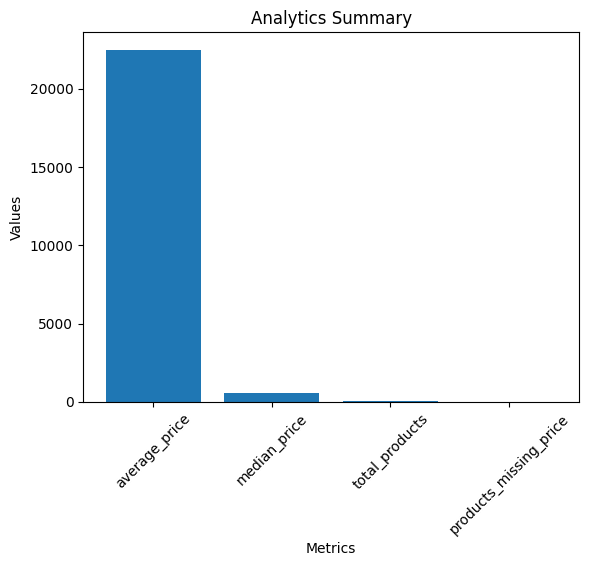

In [14]:
#plotting a barchart using OOP plot style for visualization
row = analytics_summary.iloc[0]  #iterates through each single row starting from the first index

fig, ax = plt.subplots() #creating the figure

ax.bar(row.index, row.values) #x-axis = column names and y-axis = values.

#labels
ax.set_title("Analytics Summary")
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")

##rotate labels for readability(user and developer friendly)
ax.tick_params(axis='x', rotation=45)


plt.show()


## Generate rejected_products.csv

In [15]:
"""Already generated rejected_products converted to a csv file""" 
df_rejected.to_csv("rejected_products.csv", index=False)

print(df_rejected)

          id           name  price currency created_at
3        NaN         jacket -200.0      SEK        NaT
4   SKU-1005            NaN    NaN      NaN        NaT
5   SKU-1006  designer coat    NaN      SEK 2024-05-01
6        NaN            hat    0.0      SEK        NaT
14  SKU-1015         hoodie  -50.0      SEK 2024-04-15
42  SKU-1043       cardigan    NaN      SEK 2024-11-15
51  SKU-1052           coat    NaN      SEK 2025-01-10


## Generate Top 10 most ecxpensive products and Top 10 products with most deviation 

In [ ]:
"""Using Z-score to calculate standard deviation 
Calculate mean and standard deviation.
Note:z_score= price_deviation."""

mean_price = df_valid["price"].mean() #using aggregation methods and storing them in variables to create z-score formular for price deviation later on
std_price = df_valid["price"].std()

"""Create Z-score
Note: with "abs" in "price" negative values becomes positive(so even if a price is less than z_score(price_deviation), abs makes it positive value )"""
df_valid["price_deviation"] = (abs
    (df_valid["price"] - mean_price) / std_price  #formular created for z_score using named variables above,
)

"""Absolute Z-score for deviation ranking"""

df_valid["abs_price_deviation"] = abs(df_valid["price_deviation"])

"""Top 10 highest prices"""
top_highest_price = df_valid.sort_values(
    "price", ascending=False
).head(10) #limits to 10 rows

"""Top 10 highest deviations"""
top_deviation = df_valid.sort_values(
    "abs_price_deviation", ascending=False
).head(10)

"""Keeping clean columns only"""
top_highest_price = top_highest_price[
    ["id", "name", "price", "currency"]
]

top_deviation = top_deviation[
    ["id", "name", "price", "price_deviation"]
]

"""rounding z-score(price_deviation)"""
top_deviation["price_deviation"] = top_deviation["price_deviation"].round(2)

""" Exporting to csv separately"""
top_highest_price.to_csv("top_highest_price.csv", index=False)
print(top_highest_price)

top_deviation.to_csv("top_price_deviation.csv", index=False)
print(top_deviation)

          id           name     price currency
38  SKU-1039           coat  999999.0      SEK
20  SKU-1021           ring   25000.0      SEK
19  SKU-1020          watch   15000.0      SEK
31  SKU-1032           suit    5000.0      SEK
39  SKU-1040          parka    4500.0      SEK
26  SKU-1027  winter jacket    3500.0      SEK
15  SKU-1016           coat    2500.0      SEK
33  SKU-1034         blazer    2200.0      SEK
46  SKU-1047          heels    1500.0      SEK
9   SKU-1010          boots    1500.0      SEK
          id       name     price  price_deviation
38  SKU-1039       coat  999999.0             6.78
13  SKU-1014    t-shirt       0.0             0.16
12  SKU-1013        cap      75.0             0.16
52  SKU-1053        cap      85.0             0.16
8   SKU-1009      socks      99.0             0.16
47  SKU-1048  flipflops     100.0             0.16
7   SKU-1008     gloves     120.0             0.16
41  SKU-1042   earmuffs     130.0             0.16
32  SKU-1033        tie 